In [1]:
%load_ext autoreload

In [122]:
%autoreload
from tracer.pymobility.models.mobility import random_waypoint
from tracer.pymobility.models.mobility import random_direction
from tracer.pymobility.models.mobility import random_walk
from tracer.pymobility.models.mobility import stochastic_walk

In [123]:
rw = random_waypoint(100, dimensions=(1, 1), velocity=(0.1, 0.3), wt_max=1)
# rw = random_direction(100, dimensions=(1, 1), velocity=(0.1, 0.3), wt_max=1)
# rw = random_walk(100, dimensions=(1, 1), velocity=0.05)

In [124]:
import itertools
import numpy as np

# trace = np.array(list(itertools.islice(rw, 1)))
traces = []
for i in range(24):
    traces.append(np.copy(next(rw)))

traces = np.array(traces)

In [125]:
traces.shape

(24, 100, 2)

In [126]:
traces = traces.swapaxes(0, 1)

In [127]:
traces.shape

(100, 24, 2)

Cycle #0: Switching from T[0.57781276 0.69935505] to T[0.71493254 0.67394227]
Cycle #1: Switching from T[0.71493254 0.67394227] to T[0.98492333 0.62390414]
Cycle #2: Switching from T[0.98492333 0.62390414] to T[0.83552952 0.52244556]
Cycle #3: Switching from T[0.83552952 0.52244556] to T[0.6861357  0.42098698]
Cycle #4: Switching from T[0.6861357  0.42098698] to T[0.53674189 0.3195284 ]
Cycle #5: Switching from T[0.53674189 0.3195284 ] to T[0.38734807 0.21806982]
Cycle #6: Switching from T[0.38734807 0.21806982] to T[0.15811912 0.06239241]
Cycle #7: Switching from T[0.15811912 0.06239241] to T[0.3941121  0.41222285]
Cycle #8: Switching from T[0.3941121  0.41222285] to T[0.26369392 0.75098973]
Cycle #9: Switching from T[0.26369392 0.75098973] to T[0.34064332 0.58086235]
Cycle #10: Switching from T[0.34064332 0.58086235] to T[0.41759272 0.41073498]
Cycle #11: Switching from T[0.41759272 0.41073498] to T[0.49454212 0.2406076 ]
Cycle #12: Switching from T[0.49454212 0.2406076 ] to T[0.5942

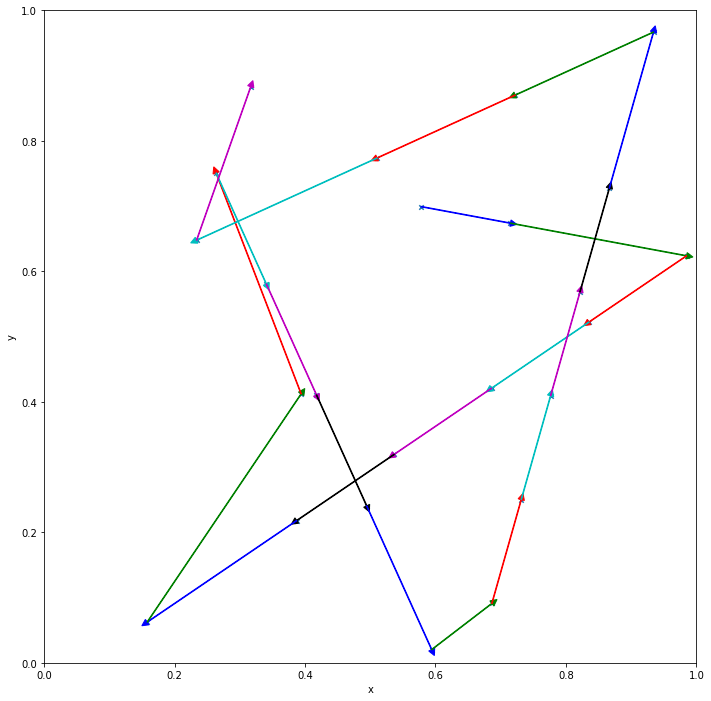

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

user_trace = traces[3]

df_trace = pd.DataFrame(user_trace, columns=['x', 'y'])
ax = df_trace.plot.scatter(
    x='x',
    y='y',
    ylim=(0, 1),
    xlim=(0, 1),
    figsize=(12, 12),
    marker='x'
)

cycol = itertools.cycle('bgrcmk')

# for i in range(trace.shape[1] - 1):
for i in range(24 - 1):
    if all(user_trace[i] == user_trace[i + 1]):
        print(f'Cycle #{i}: Staying in tower T{user_trace[i]}')
        continue
    x1, y1 = user_trace[i]
    x2, y2 = user_trace[i + 1]

    print(f'Cycle #{i}: Switching from T{user_trace[i]} to T{user_trace[i + 1]}')
    color = next(cycol)
    ax.arrow(
        x1,
        y1,
        x2 - x1,
        y2 - y1,
        head_width=0.01,
        head_length=0.01,
        fc=color,
        ec=color
    )

plt.gca().set_aspect('equal', adjustable='box')
